# –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ ‚Ññ1 "–ê–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö —Ñ–æ–Ω–¥–æ–≤–æ–≥–æ —Ä—ã–Ω–∫–∞"
#### –í—ã–ø–æ–ª–Ω–∏–ª–∏: –ú–µ–ª—å–Ω–∏–∫–æ–≤, –ú–∞–ª—ã—à–µ–≤–∞, –°–µ–ª–∏–≤–∞–Ω–æ–≤—Å–∫–∞—è

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. –°–æ–±—Ä–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–Ω–µ–≤–Ω—ã–º —Ü–µ–Ω–∞–º –∞–∫—Ç–∏–≤–æ–≤ (–∞–∫—Ü–∏–π) –∏ –¥–Ω–µ–≤–Ω—ã–º –æ–±—ä–µ–º–∞–º –ø—Ä–æ–¥–∞–∂ –Ω–∞ –∑–∞–¥–∞–Ω–Ω–æ–º —Ñ–æ–Ω–¥–æ–≤–æ–º —Ä—ã–Ω–∫–µ –∑–∞ —É–∫–∞–∑–∞–Ω–Ω—ã–π –ø–µ—Ä–∏–æ–¥. –î–æ–±–∞–≤–∏—Ç—å (–µ—Å–ª–∏ –Ω–µ—Ç) –¥–∞–Ω–Ω—ã–µ –ø–æ –∏–Ω–¥–µ–∫—Å—É —Ä—ã–Ω–∫–∞. 

–î–ª—è –Ω–∞—á–∞–ª–∞ –Ω–∞–º–∏ –±—ã–ª —Å–∫–∞—á–∞–Ω —Å–ø–∏—Å–æ–∫ –∫–æ–º–ø–∞–Ω–∏–π, —Ç–æ—Ä–≥—É—é—â–∏—Ö—Å—è –Ω–∞ —Ñ–æ–Ω–¥–æ–≤–æ–π –±–∏—Ä–∂–µ NASDAQ. –ó–∞—Ç–µ–º –ø–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º—É —Å–ø–∏—Å–∫—É —Ç–∏–∫–µ—Ä–æ–≤ –º—ã –ø–æ–¥–≥—Ä—É–∑–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–Ω–µ–≤–Ω—ã–º —Ü–µ–Ω–∞–º –∞–∫—Ç–∏–≤–æ–≤ —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ yfinance. 

–î–∞—Ç–∞—Å–µ—Ç –ø–æ –∏–Ω–¥–µ–∫—Å—É —Ä—ã–Ω–∫–∞ –±—ã–ª —Å–∫–∞—á–∞–Ω —Å https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC

In [2]:
nasdaq = pd.read_excel("NASDAQ.xlsx")
tickers = nasdaq['Symbol']
tickers_list = list()
for ticker in tickers:
    tickers_list.append(ticker)

In [3]:
#data = yf.download(tickers_list,'2019-01-02','2019-12-31')
#data.to_pickle('ticker_data')

–°–ª–µ–¥—É–µ—Ç —É—Ç–æ—á–Ω–∏—Ç—å, —á—Ç–æ –≤—Å–µ –¥–∞–ª—å–Ω–µ–π—à–∏–µ —Ä–∞—Å—á–µ—Ç—ã –±—É–¥—É—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è –ø–æ —Å–∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω–æ–π —Ü–µ–Ω–µ –∑–∞–∫—Ä—ã—Ç–∏—è (Adjusted Close). –°—Ç–æ–ª–±—Ü—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è, –±—É–¥—É—Ç —É–¥–∞–ª–µ–Ω—ã.

In [4]:
#stock data
data = pd.read_pickle('ticker_data')
data = data.drop(columns = ['Low', 'High', 'Open', 'Close'])
#market index data
index = pd.read_csv('index_ixic.csv', sep=",")
index = index.drop(columns = ['Low', 'High', 'Open', 'Close'])

–ü—Ä–æ–≤–µ–¥–µ–º –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–∞–Ω–Ω—ã—Ö: —Å–æ–∑–¥–∞–¥–∏–º –¥–≤–∞ —Ñ—Ä–µ–π–º–∞ –¥–∞–Ω–Ω—ã—Ö adj_close –∏ volume, –∫ –æ—Å–Ω–æ–≤–Ω—ã–º –¥–∞–Ω–Ω—ã–º –≤ —ç—Ç–∏—Ö —Ñ—Ä–µ–π–º–∞—Ö –¥–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∏–Ω–¥–µ–∫—Å—É —Ä—ã–Ω–∫–∞, —É–¥–∞–ª–∏–º –≤—Å–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. 

–í –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∏–º –¥–∞–Ω–Ω—ã–µ –æ 250-—Ç–∏ —Ç–æ—Ä–≥–æ–≤—ã—Ö –¥–Ω—è—Ö.

In [5]:
adj_close = data['Adj Close'] # adjusted closing price
volume = data['Volume'] # sales volume


adj_close.reset_index(level=0, inplace=True) # set index from date to int
volume.reset_index(level=0, inplace=True)

for i in range(0, len(adj_close['Date'])):
    volume.loc[i, 'Date'] = str(volume['Date'][i].date())
    adj_close.loc[i, 'Date'] = str(adj_close['Date'][i].date())


adj_indexes = set(adj_close['Date'].to_list())
ind_indexes = set(index['Date'].to_list())
diff = adj_indexes.difference(ind_indexes)

In [6]:
adj_close = adj_close.loc[adj_close['Date'] != '2019-11-28']
volume = volume.loc[volume['Date'] != '2019-11-28']

#handling missing values
adj_close = adj_close.dropna(axis=1, how='any')
volume = volume.dropna(axis=1, how='any')

#add the index data to the main data
adj_close['IXIC'] = index['Adj Close']
volume['IXIC'] = index['Volume']

#delete last day as ixic is nan
adj_close = adj_close.loc[adj_close['Date'] != '2019-12-30']
volume = volume.loc[volume['Date'] != '2019-12-30']

#reindex after drop
adj_close.reset_index(drop=True, inplace=True)

In [7]:
#reduce the number of tickers
tickers_to_delete = adj_close.columns.to_list()
tickers_to_delete.remove('Date')
tickers_to_delete.remove('IXIC')
tickers_to_delete = tickers_to_delete[::2]
adj_close.drop(tickers_to_delete, inplace=True, axis=1) 
volume.drop(tickers_to_delete, inplace=True, axis=1) 

## 2. –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ —Ü–µ–Ω–∞–º –≤ –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫—É—é –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å). –í—ã—á–∏—Å–ª–∏—Ç–µ –æ—Ü–µ–Ω–∫–∏ –æ–∂–∏–¥–∞–µ–º—ã—Ö –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –∏ –ø–æ—Å—Ç—Ä–æ–π—Ç–µ ¬´–∫–∞—Ä—Ç—É¬ª –∞–∫—Ç–∏–≤–æ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (œÉ, E). 

–ò—Ç–∞–∫, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∏–∑ –¥–∞–Ω–Ω—ã—Ö –ø–æ —Ü–µ–Ω–∞–º –∑–∞–∫—Ä—ã—Ç–∏—è –ø–æ–ª—É—á–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º. –î–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∞—Å—å –ª–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å (–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–Ω—ã –∑–∞–∫—Ä—ã—Ç–∏—è —Ç–µ–∫—É—â–µ–≥–æ –¥–Ω—è –∫ –ø—Ä–µ–¥—ã–¥—É—â–µ–º—É).

In [8]:
# calculate logarithmic returns
log_returns = pd.DataFrame(index = adj_close.index, columns = adj_close.columns)
log_returns['Date'] = adj_close['Date']
tickers = adj_close.columns.to_list()
tickers.remove('Date')


num_days=len(log_returns['AADR'])
for ticker in tickers:
    for i in range(1, num_days):
        log_returns.loc[i, ticker] = np.log(adj_close.loc[i, ticker]/adj_close.loc[i-1, ticker])
#dropping first day
log_returns = log_returns.dropna(axis=0, how='any')
log_returns.reset_index( drop=True, inplace=True) 

In [9]:
log_returns

Date      AADR      AAOI      AAPL      AAXJ      ABEO      ABMD  \
0    2019-01-03 -0.011221 -0.053018 -0.104924   -0.0239 -0.060091 -0.025056   
1    2019-01-04   0.03813  0.031375  0.041803  0.032423  0.058668  0.036221   
2    2019-01-07  0.011758  0.008969 -0.002228  0.005954  0.067472   0.00433   
3    2019-01-08  0.006894  0.020828  0.018884  0.002652 -0.026992  0.011434   
4    2019-01-09  0.016681  0.006847  0.016839  0.016994       0.0   0.05493   
..          ...       ...       ...       ...       ...       ...       ...   
244  2019-12-20  0.008244 -0.016057 -0.002073  0.003156 -0.471605 -0.039365   
245  2019-12-23  0.002423  0.002694  0.016187  0.000411    0.1514  0.045308   
246  2019-12-24  0.005199 -0.002694   0.00095 -0.003017 -0.008299  0.010854   
247  2019-12-26   0.00554  0.043121  0.019646  0.006161       0.0 -0.007515   
248  2019-12-27   0.00386 -0.007782  -0.00038  0.005988 -0.051293 -0.010227   

         ABUS       ACB      ACER  ...      ZEAL      ZEUS      ZGNX  \
0   -0.059219 -0.019268  -0.05019  ...  0.025581  0.005219       0.0   
1    0.083912  0.015444  0.052518  ...   0.04098  0.067908  0.075212   
2    0.024098  0.007634  0.071347  ...  0.045176  0.036411  0.049797   
3   -0.036368 -0.044711  0.017601  ...  0.005776  0.008754  0.026254   
4   -0.058467  0.080196  0.004246  ...  0.019464  0.019563 -0.001804   
..        ...       ...       ...  ...       ...       ...       ...   
244  0.237081  -0.00885 -0.033379  ...  0.033544 -0.019242 -0.011079   
245 -0.049656 -0.112795  0.015544  ... -0.006127  0.023158  0.024477   
246       0.0     -0.01  0.020357  ...  0.008111  0.002231 -0.005262   
247 -0.048427  0.005013 -0.012674  ...   0.03578  0.005556 -0.009086   
248 -0.050892 -0.046044  0.002548  ...   0.02498 -0.021844 -0.018617   

        ZIONO      ZIXI      ZLAB        ZS      ZUMZ      ZYXI      IXIC  
0    0.001177  0.008525 -0.026814 -0.012385  -0.01334  -0.02452  -0.03084  
1    0.012858  0.011815   0.01327  0.060445  0.024995  0.045068   0.04172  
2    0.004635  0.010017  0.026907  0.041961  0.046268  0.003384  0.012477  
3    0.013017  0.051792  0.005736  0.009596  0.014327  -0.00678  0.010718  
4   -0.004193  -0.02233  0.019604  0.020257  0.008499  0.020203  0.008673  
..        ...       ...       ...       ...       ...       ...       ...  
244 -0.006804  0.010409 -0.014257  0.025146 -0.014335 -0.048603  0.002316  
245  0.003945  0.056089  0.005115 -0.019733  0.014644  0.044851  0.000808  
246 -0.001433 -0.019775 -0.008454 -0.008967 -0.001858  0.021079  0.007734  
247 -0.009363 -0.028946 -0.016602  0.008759  0.026603 -0.013589 -0.001749  
248  0.002169 -0.001469  0.051489 -0.011486 -0.014284  0.001243 -0.006754  

[249 rows x 1192 columns]

–î–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –æ–∂–∏–¥–∞–µ–º–æ–π –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –∏ —Ä–∏—Å–∫–∞ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ numpy (mean –∏ std).

In [10]:
#calculate the estimates of the mathematical expectation and std for each stock
ListOfStats = ['Mean', 'Std']

stats = pd.DataFrame(columns = ListOfStats, index = tickers)

for ticker in tickers:
    mean = np.mean(log_returns[ticker])
    std = np.std(log_returns[ticker])

    stats['Mean'][ticker] = mean
    stats['Std'][ticker] = std

stats

Mean       Std
AADR  0.001235  0.008494
AAOI -0.001289  0.035969
AAPL  0.002498  0.016628
AAXJ  0.000701  0.009755
ABEO -0.002894  0.074221
...        ...       ...
ZLAB  0.002372   0.02618
ZS    0.000719  0.033341
ZUMZ  0.002048  0.028808
ZYXI  0.004114  0.045107
IXIC  0.001182  0.009934

[1191 rows x 2 columns]

<b>–¢–µ–ø–µ—Ä—å –ø–æ—Å—Ç—Ä–æ–∏–º "–∫–∞—Ä—Ç—É" –∞–∫—Ç–∏–≤–æ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (œÉ, E):</b>

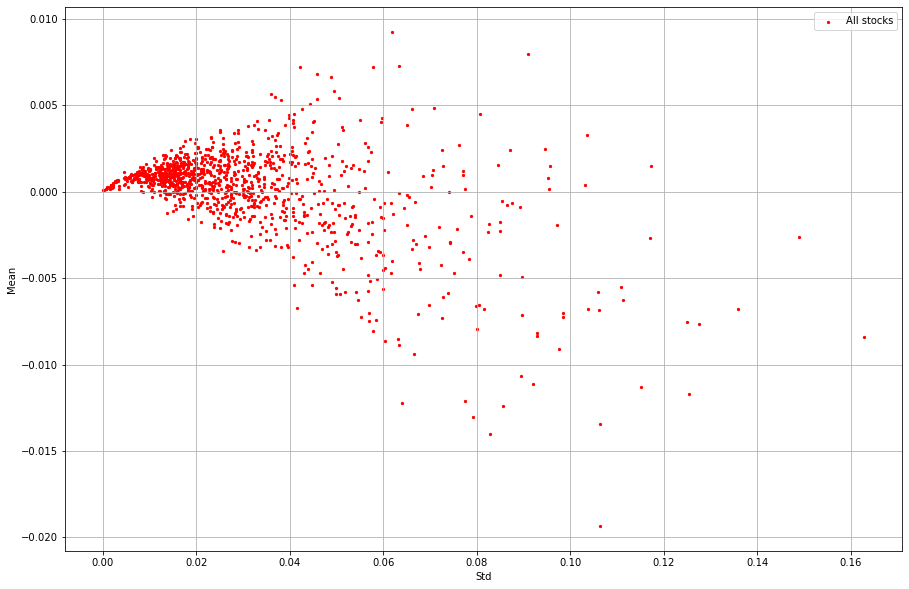

In [11]:
stats.plot(x='Std', y='Mean', color="red", kind="scatter", marker=".", label='All sto—Åks', figsize=(15,10), grid='On')
plt.legend()
plt.show()

<b> –ü–æ –≥—Ä–∞—Ñ–∏–∫—É –≤–∏–¥–Ω–æ, —á—Ç–æ: </b>
<ul>
<li> –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∞–∫—Ç–∏–≤–æ–≤ –æ–±–ª–∞–¥–∞—é—Ç –Ω–µ–≤—ã—Å–æ–∫–æ–π –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å—é –∏ —Å—Ç–µ–ø–µ–Ω—å—é —Ä–∏—Å–∫–∞;</li> 
<li> –µ—Å—Ç—å –∞–∫—Ç–∏–≤—ã —Å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–π –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å—é, –∞ –≤–æ—Ç –±–µ–∑—Ä–∏—Å–∫–æ–≤—ã—Ö –∞–∫—Ç–∏–≤–æ–≤ (std=0) –Ω–µ—Ç;</li>
<li> c —É–≤–µ–ª–∏—á–µ–Ω–∏–µ–º –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ —Ä–∞—Å—Ç–µ—Ç —Ä–∏—Å–∫ –∏ —É–º–µ–Ω—å—à–∞–µ—Ç—Å—è –ø–ª–æ—Ç–Ω–æ—Å—Ç—å —Ç–æ—á–µ–∫ –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤.</li>
</ul>

## 3. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –ø–æ—Ä—Ç—Ñ–µ–ª—å —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞ –∏ –æ—Ç–º–µ—Ç—å—Ç–µ –µ–≥–æ –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç   (œÉ, E).  –î–∞–π—Ç–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É —ç—Ç–æ–º—É –ø–æ—Ä—Ç—Ñ–µ–ª—é.

In [12]:
log_returns_without_date = log_returns.drop(columns = ['Date'])
returns_eqw = []
for index, row in log_returns_without_date.iterrows():
    returns_eqw.append(np.sum(row)/len(tickers))

sum_returns = 0

for ticker in tickers:
    sum_returns += stats['Mean'][ticker]
mean_eqw = sum_returns/len(tickers)
    
var = 0

for i in range(0, len(tickers)):
    for j in range(i, len(tickers)):
        var += (np.cov(log_returns[tickers[i]].astype(float), log_returns[tickers[j]].astype(float))[0][1])/(len(tickers)**2)
    
std_eqw = math.sqrt(var)


–û—Ç–º–µ—Ç–∏–º –ø–æ—Ä—Ç—Ñ–µ–ª—å —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞ –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤:

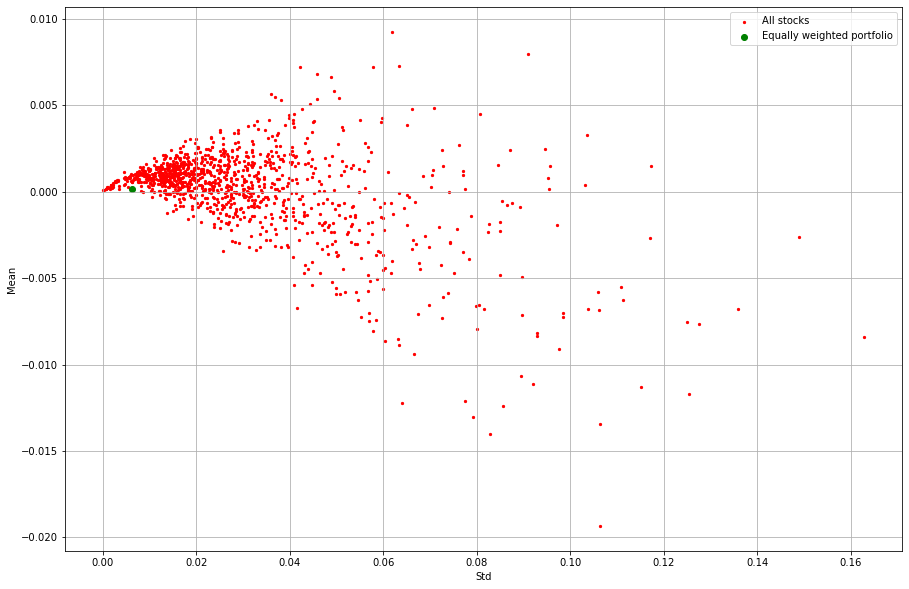

–û–∂–∏–¥–∞–µ–º–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞:  0.0011815037881726855
–†–∏—Å–∫ –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞:  0.009933777608107808


In [13]:
stats.plot(x='Std', y='Mean', color="red", kind="scatter", label='All sto—Åks', marker = ".", figsize=(15,10), grid='On')
plt.scatter(std_eqw, mean_eqw, color="green", label='Equally weighted portfolio')
plt.legend()
plt.show()
print("–û–∂–∏–¥–∞–µ–º–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞: ", stats['Mean']['IXIC'])
print("–†–∏—Å–∫ –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∫–∞–ø–∏—Ç–∞–ª–∞: ", stats['Std']['IXIC'])

–ú–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –≤–∫–ª–∞–¥—ã–≤–∞—Ç—å—Å—è –≤ –ø–æ—Ä—Ç—Ñ–µ–ª—å —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è —Ä–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º, —Ç–∞–∫ –∫–∞–∫ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –∞–∫—Ç–∏–≤—ã —Å –º–µ–Ω—å—à–∏–º —Ä–∏—Å–∫–æ–º –∏ –±–æ–ª—å—à–µ–π –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å—é.

## 4. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –∏–Ω–¥–µ–∫—Å —Ä—ã–Ω–∫–∞ –∏ –æ—Ç–º–µ—Ç—å—Ç–µ –µ–≥–æ –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤ –≤ —Å–∏—Å—Ç–µ–º–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (œÉ,E). –î–∞–π—Ç–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É –∏–Ω–¥–µ–∫—Å—É —Ä—ã–Ω–∫–∞.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∏–Ω–¥–µ–∫—Å NASDAQ Composite (IXIC). –≠—Ç–æ  —Ñ–æ–Ω–¥–æ–≤—ã–π –∏–Ω–¥–µ–∫—Å, —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–π –∏–∑ –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω—ã—Ö –∞–∫—Ü–∏–π –∏ –ø–æ–¥–æ–±–Ω—ã—Ö —Ñ–∏–Ω–∞–Ω—Å–æ–≤—ã—Ö –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ –≤—Å–µ—Ö –∫–æ–º–ø–∞–Ω–∏–π, —Ç–æ—Ä–≥—É—é—â–∏—Ö—Å—è –Ω–∞ –±–∏—Ä–∂–µ NASDAQ. –í–∫–ª—é—á–∞–µ—Ç –≤ —Å–µ–±—è –±–æ–ª–µ–µ 3000 –∫–æ—Ä–ø–æ—Ä–∞—Ü–∏–π. 

–í —Å–∏–ª—É —Å–ø–µ—Ü–∏—Ñ–∏–∫–∏ –±–∏—Ä–∂–∏ NASDAQ –∏–Ω–¥–µ–∫—Å —Å—á–∏—Ç–∞–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–º –¥–∏–Ω–∞–º–∏–∫–∏ –∫—É—Ä—Å–æ–≤ —Ü–µ–Ω–Ω—ã—Ö –±—É–º–∞–≥ –≤—ã—Å–æ–∫–æ—Ç–µ—Ö–Ω–æ–ª–æ–≥–∏—á–Ω—ã—Ö –∏ –±—ã—Å—Ç—Ä–æ —Ä–∞—Å—Ç—É—â–∏—Ö –∫–æ–º–ø–∞–Ω–∏–π.

–û—Ç–º–µ—Ç–∏–º –∏–Ω–¥–µ–∫—Å —Ä—ã–Ω–∫–∞ –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤:

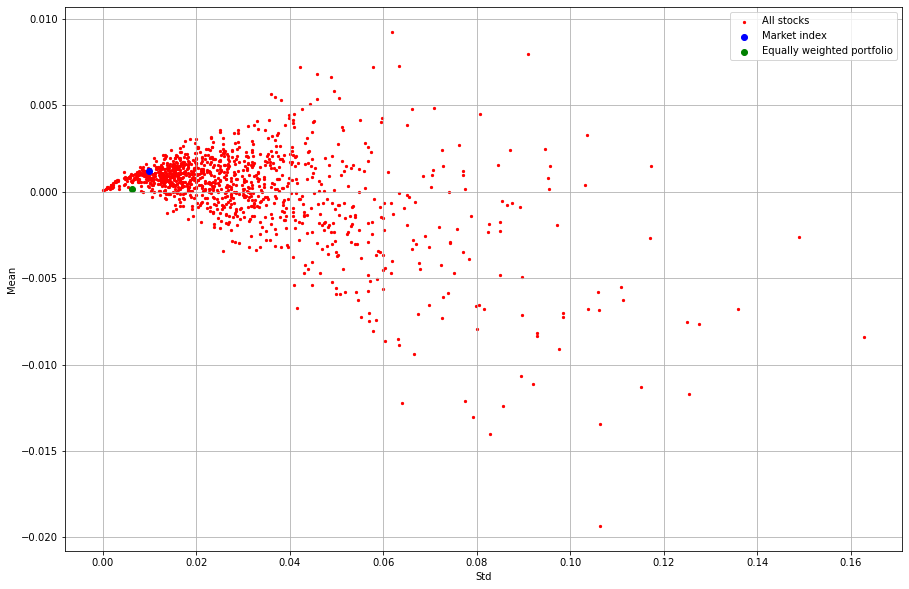

–û–∂–∏–¥–∞–µ–º–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–∞ IXIC:  0.0011815037881726855
–†–∏—Å–∫ –∏–Ω–¥–µ–∫—Å–∞ IXIC:  0.009933777608107808


In [14]:
stats.plot(x='Std', y='Mean', color="red", kind="scatter", label='All sto—Åks', marker=".", grid="On", figsize=(15,10))
plt.scatter(stats['Std']['IXIC'], stats['Mean']['IXIC'], color="blue", label='Market index')
plt.scatter(std_eqw, mean_eqw, color="green", label='Equally weighted portfolio')
plt.legend()
plt.show()
print("–û–∂–∏–¥–∞–µ–º–∞—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –∏–Ω–¥–µ–∫—Å–∞ IXIC: ", stats['Mean']['IXIC'])
print("–†–∏—Å–∫ –∏–Ω–¥–µ–∫—Å–∞ IXIC: ", stats['Std']['IXIC'])

–ò–Ω–¥–µ–∫—Å —Ä—ã–Ω–∫–∞ –Ω–µ —è–≤–ª—è–µ—Ç—Å—è –ü–∞—Ä–µ—Ç–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º. –ï–≥–æ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—å –≤—ã—à–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –ø–æ—Ä—Ç—Ñ–µ–ª—è –∏–∑ –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–æ–≤ —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏, —Ö–æ—Ç—è —Ä–∏—Å–∫ –Ω–µ—Å–∫–æ–ª—å–∫–æ –≤—ã—à–µ.

## 5. –ó–∞–¥–∞–π—Ç–µ —É—Ä–æ–≤–µ–Ω—å —Ä–∏—Å–∫–∞ –∏ –æ—Ü–µ–Ω–∏—Ç–µ VaR (Value at Risk = –°—É–º–º–∞ –ø–æ–¥ –†–∏—Å–∫–æ–º) –¥–ª—è –∞–∫—Ç–∏–≤–æ–≤ –≤–∞—à–µ–≥–æ —Ä—ã–Ω–∫–∞. –ö–∞–∫–æ–π –∏–∑ –∞–∫—Ç–∏–≤–æ–≤ –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª–µ–Ω –ø–æ —ç—Ç–æ–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫–µ?  –ì–¥–µ –æ–Ω —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω –Ω–∞ –∫–∞—Ä—Ç–µ –∞–∫—Ç–∏–≤–æ–≤? –î–∞–π—Ç–µ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–∏—Å—Ç–∏–∫—É VaR –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ –∏ –∏–Ω–¥–µ–∫—Å–∞ —Ä—ã–Ω–∫–∞.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ —Å—É–º–º—ã –ø–æ–¥ —Ä–∏—Å–∫–æ–º –¥–ª—è –¥–≤—É—Ö —É—Ä–æ–≤–Ω–µ–π –¥–æ–≤–µ—Ä–∏—è ($\gamma=90%$ –∏ $\gamma=95%$).

In [15]:
losses = -log_returns.drop(['Date'], axis=1) # losses for every ticker and market index

losses_eqw = [-x for x in returns_eqw] # losses for equally weighted portfolio

VaR1 = np.quantile(losses, q=0.9, axis=0)
VaR1 = pd.DataFrame(columns = tickers, data=[VaR1])

VaR2 = np.quantile(losses, q=0.95, axis=0)
VaR2 = pd.DataFrame(columns = tickers, data=[VaR2])

In [16]:
print("VaR –¥–ª—è –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–æ–≤ –ø—Ä–∏ Œ≥ = 0.9")
VaR1.drop(['IXIC'], axis=1)

VaR –¥–ª—è –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–æ–≤ –ø—Ä–∏ Œ≥ = 0.9


AADR      AAOI      AAPL      AAXJ      ABEO      ABMD      ABUS  \
0  0.009901  0.040697  0.014789  0.010906  0.070734  0.031014  0.060819   

        ACB      ACER      ACGL  ...        Z      ZEAL      ZEUS      ZGNX  \
0  0.052681  0.049744  0.012701  ...  0.02928  0.031683  0.035032  0.024901   

      ZIONO      ZIXI      ZLAB        ZS      ZUMZ     ZYXI  
0  0.007398  0.029793  0.028422  0.031536  0.028013  0.04669  

[1 rows x 1190 columns]

In [17]:
print("VaR –¥–ª—è –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–æ–≤ –ø—Ä–∏ Œ≥ = 0.95")
VaR2.drop(['IXIC'], axis=1)

VaR –¥–ª—è –≤—Å–µ—Ö –∞–∫—Ç–∏–≤–æ–≤ –ø—Ä–∏ Œ≥ = 0.95


AADR      AAOI      AAPL      AAXJ      ABEO      ABMD      ABUS  \
0  0.012909  0.055037  0.020887  0.015551  0.085274  0.041589  0.085588   

        ACB      ACER      ACGL  ...         Z      ZEAL      ZEUS      ZGNX  \
0  0.069905  0.081211  0.017916  ...  0.038928  0.050352  0.047731  0.032475   

     ZIONO      ZIXI      ZLAB        ZS      ZUMZ    ZYXI  
0  0.01036  0.036164  0.040578  0.045305  0.043528  0.0575  

[1 rows x 1190 columns]

In [18]:
print(f"–ü—Ä–∏ Œ≥ = 0.9 –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–º —è–≤–ª—è–µ—Ç—Å—è –∞–∫—Ç–∏–≤ {VaR1.loc[0].idxmin()}, VaR={VaR1.loc[0].min()}")
print(f"–ü—Ä–∏ Œ≥ = 0.95 –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–º —è–≤–ª—è–µ—Ç—Å—è –∞–∫—Ç–∏–≤ {VaR2.loc[0].idxmin()}, VaR={VaR2.loc[0].min()}")

–ü—Ä–∏ Œ≥ = 0.9 –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–º —è–≤–ª—è–µ—Ç—Å—è –∞–∫—Ç–∏–≤ SHV, VaR=9.052570779485673e-05
–ü—Ä–∏ Œ≥ = 0.95 –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω—ã–º —è–≤–ª—è–µ—Ç—Å—è –∞–∫—Ç–∏–≤ FTSM, VaR=0.00016654477849707976


In [19]:
VaR = np.quantile(losses["IXIC"], q=0.9)
print(f"–ü—Ä–∏ Œ≥ = 0.9 VaR –∏–Ω–¥–µ–∫—Å–∞ —Ä—ã–Ω–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {VaR}")

VaR = np.quantile(losses["IXIC"], q=0.95)
print(f"–ü—Ä–∏ Œ≥ = 0.95 VaR –∏–Ω–¥–µ–∫—Å–∞ —Ä—ã–Ω–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {VaR}")

–ü—Ä–∏ Œ≥ = 0.9 VaR –∏–Ω–¥–µ–∫—Å–∞ —Ä—ã–Ω–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.01113094471865213
–ü—Ä–∏ Œ≥ = 0.95 VaR –∏–Ω–¥–µ–∫—Å–∞ —Ä—ã–Ω–∫–∞ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.015540042124616928


In [20]:
VaR = np.quantile(losses_eqw, q=0.90)
print(f"–ü—Ä–∏ Œ≥ = 0.9 VaR –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {VaR}")

VaR = np.quantile(losses_eqw, q=0.95)
print(f"–ü—Ä–∏ Œ≥ = 0.95 VaR –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç {VaR}")

–ü—Ä–∏ Œ≥ = 0.9 VaR –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.009864657822807325
–ü—Ä–∏ Œ≥ = 0.95 VaR –ø–æ—Ä—Ç—Ñ–µ–ª—è —Å —Ä–∞–≤–Ω—ã–º–∏ –¥–æ–ª—è–º–∏ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.013920772664622586


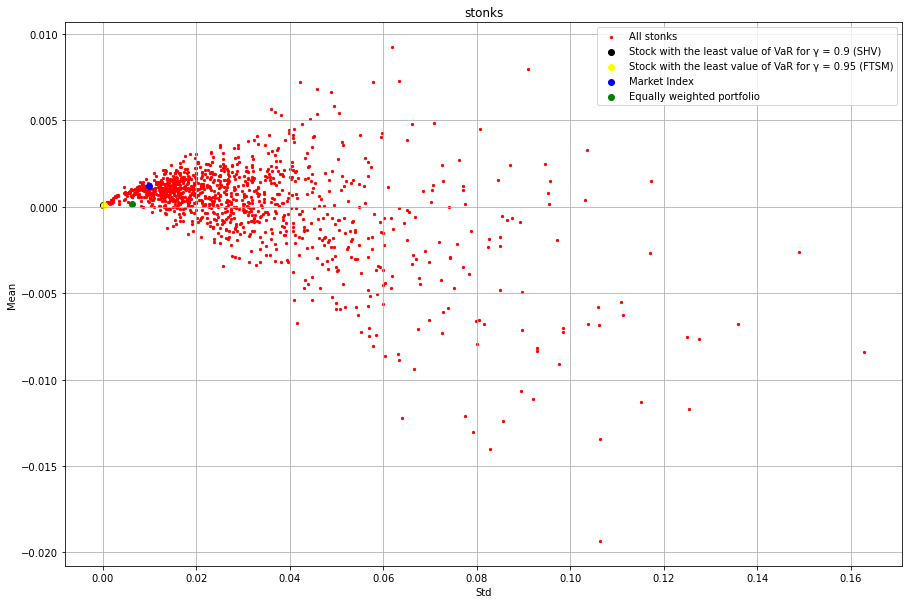

In [21]:
stats.plot(title = "stonks", x='Std', y='Mean', color="red", kind="scatter", label="All stonks", marker = ".", figsize=(15,10), grid='On')
plt.scatter(stats['Std'][VaR1.loc[0].idxmin()], stats['Mean'][VaR1.loc[0].idxmin()], color="black", label=f"Stock with the least value of VaR for Œ≥ = 0.9 ({VaR1.loc[0].idxmin()})")
plt.scatter(stats['Std'][VaR2.loc[0].idxmin()], stats['Mean'][VaR2.loc[0].idxmin()], color="yellow", label=f"Stock with the least value of VaR for Œ≥ = 0.95 ({VaR2.loc[0].idxmin()})")
plt.scatter(stats['Std']["IXIC"], stats['Mean']["IXIC"], color="blue", label="Market Index")
plt.scatter(std_eqw, mean_eqw, color="green", label='Equally weighted portfolio')
plt.legend()
plt.show()

## 6. –í—ã–±–µ—Ä–∏—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö (–∑–Ω–∞—á–∏–º—ã—Ö)  –∞–∫—Ç–∏–≤–æ–≤ —Ä—ã–Ω–∫–∞.   –ú–æ–∂–Ω–æ –ª–∏ —Å—á–∏—Ç–∞—Ç—å –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ (–æ–±—ä–µ–º—ã –ø—Ä–æ–¥–∞–∂) –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è (–±–µ–ª—ã–π —à—É–º)?  –ü–æ–∏—â–∏—Ç–µ –Ω–∞—É—á–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã –∫ –æ—Ç–≤–µ—Ç—É –Ω–∞ —ç—Ç–æ—Ç –≤–æ–ø—Ä–æ—Å (–ø—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑—ã –æ —Å–ª—É—á–∞–π–Ω–æ—Å—Ç–∏, –ò–≤—á–µ–Ω–∫–æ –ì.–ò. –ú–µ–¥–≤–µ–¥–µ–≤ –Æ.–ò. –í–≤–µ–¥–µ–Ω–∏–µ –≤ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É)

–ë—ã–ª–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∞–∫—Ç–∏–≤—ã: ACER, AAPL, HIFS, PATK. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —è–≤–ª—è—é—Ç—Å—è –ª–∏ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–∞ –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

$H_0$: –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç —Å–æ–±–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –∏—Å—Ö–æ–¥—ã —Å–ª—É—á–∞–π–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã

$H_1$: –Ω–∞–±–ª—é–¥–µ–Ω–∏—è —è–≤–ª—è—é—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è 


### –ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π
–í—ã—á–∏—Å–ª—è–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É $A$, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–∑ —Å–µ–±—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–Ω–≤–µ—Ä—Å–∏–π (–Ω–µ—Ä–∞–≤–µ–Ω—Å—Ç–≤ –≤–∏–¥–∞ $X_i > X_j$ –ø—Ä–∏ $i < j$)

–ï—Å–ª–∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –¥–ª–∏–Ω—ã $n$ —Å–æ—Å—Ç–æ–∏—Ç –∏–∑ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö —Å–ª—É—á–∞–π–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω, —Ç–æ —á–∏—Å–ª–æ –∏–Ω–≤–µ—Ä—Å–∏–π —è–≤–ª—è–µ—Ç—Å—è —Å–ª—É—á–∞–π–Ω–æ–π
–≤–µ–ª–∏—á–∏–Ω–æ–π —Å –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–º –æ–∂–∏–¥–∞–Ω–∏–µ–º –∏ –¥–∏—Å–ø–µ—Ä—Å–∏–µ–π —Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–∏–¥–∞:

$E(A) = \frac{n(n-1)}{4}$

$D(A) = \frac{n(2n+5)(n-1)}{72}$

–ì–¥–µ $n$ - —á–∏—Å–ª–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π 

–ü—Ä–∏ –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö $n$ ($>10$) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ $A$ –º–æ–∂–Ω–æ –ø—Ä–∏–Ω—è—Ç—å –∫–∞–∫ –Ω–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ.

–ü–æ—ç—Ç–æ–º—É –µ—Å–ª–∏

$\frac{|A - E(A)|}{\sqrt{D(A)}} > z_{1 - \frac{1}{\alpha}}$ (–≥–¥–µ $z_{1 - \frac{1}{\alpha}}$ - –∫–≤–∞–Ω—Ç–∏–ª—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è),

—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ $H_0$ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è 





In [22]:
def inversion_criteria(ticker_log_returns, ticker_name, alpha):
    n_observations = ticker_log_returns.shape[0]    
    
    n_inversions = 0 # statistic (A)
    for i in range(n_observations - 1):
        for j in range(i+1, n_observations): 
            if ticker_log_returns[i] > ticker_log_returns[j]:
                n_inversions += 1
    
    mu_inv = (n_observations*(n_observations - 1))/4
    sigma_sq_inv = (2*n_observations**2 + 3*n_observations**2 - 5*n_observations)/72
    
    inv_norm_distr = abs((n_inversions - mu_inv)/math.sqrt(sigma_sq_inv))
    
    if inv_norm_distr < scipy.stats.norm.ppf(1 - (alpha/2)):
        print(f"–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è {ticker_name}. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è")
    else:
        print(f"–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è {ticker_name}. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è")

### –ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏–∏

–ï—Å–ª–∏ –≤—ã–±–æ—Ä–∫–∞ $(x_1, x_2, ..., x_n)$ —Ä–∞–∑–º–µ—Ä–∞ $n$ —Å–ª—É—á–∞–π–Ω–∞, —Ç–æ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∂–¥–æ–≥–æ –µ–µ —ç–ª–µ–º–µ–Ω—Ç–∞ –Ω–µ –¥–æ–ª–∂–Ω–æ –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –≤–µ–ª–∏—á–∏–Ω—ã –ø—Ä–µ–¥—à–µ—Å—Ç–≤—É—é—â–µ–≥–æ –∏ –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —á–ª–µ–Ω–æ–≤. –î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ —ç—Ç–æ–π –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å–ª–µ–¥—É—é—â–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:

$A = \frac{n\sum_{i=1}^{n-1}{x_ix_{i+1}}  -  (\sum_{i=1}^{n}{x_i})^2 + nx_1x_n}{n\sum_{i=1}^{n}{x_i^2}  -  (\sum_{i=1}^{n}{x_i})^2} $

$E(A) = - \frac{1}{n-1}$

$D(A) = - \frac{n(n-3)}{(n+1)(n-1)^2} $

–ü—Ä–∏–º–µ–Ω—è—è –∫—Ä–∏—Ç–µ—Ä–∏–π, –∏—Å–ø–æ–ª—å–∑—É—é—Ç –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—É—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É

$A^* = \frac{A - E(A)}{\sqrt{D(A)}}$

–ï—Å–ª–∏

$\frac{|A - E(A)|}{\sqrt{D(A)}} > z_{1 - \frac{1}{\alpha}}$ (–≥–¥–µ $z_{1 - \frac{1}{\alpha}}$ - –∫–≤–∞–Ω—Ç–∏–ª—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è),

—Ç–æ –≥–∏–ø–æ—Ç–µ–∑–∞ $H_0$ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è


In [23]:
def autocorrelation_criteria(ticker_log_returns, ticker_name, alpha):
    n_observations = ticker_log_returns.shape[0] # n
    
    sum_xixi1 = 0 # sum of x_i*x_{i+1}
    sum_xi = 0 # sum of x_i
    sum_xi_sq = 0 # sum of x_{i}^{2}
        
    for i in range(n_observations - 1):
        sum_xixi1 += ticker_log_returns[i]*ticker_log_returns[i+1] 
    for i in range(n_observations):
        sum_xi += ticker_log_returns[i]
        sum_xi_sq += ticker_log_returns[i]**2
           
    A = ( # statistic
        (n_observations*sum_xixi1 - sum_xi**2 
        + n_observations*ticker_log_returns[0]*ticker_log_returns[n_observations-1]
        ) 
        /
        (
        n_observations*sum_xi_sq - sum_xi**2
        )
    )
    
    exp_val = -(1/(n_observations - 1)) # expected_value (–º–∞—Ç –æ–∂–∏–¥–∞–Ω–∏–µ)
    var = (
        (n_observations*(n_observations-3))
        /
        ((n_observations+1)*(n_observations-1)**2) # variance (–¥–∏—Å–ø–µ—Ä—Å–∏—è)
    )
    
    A_st = (A - exp_val)/(math.sqrt(var)) # A-star (A*)
    
    if A_st < scipy.stats.norm.ppf(1 - (alpha/2)):
        print(f"–ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è {ticker_name}. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è")
    else:
        print(f"–ö—Ä–∏—Ç–µ—Ä–∏–π –∫—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è {ticker_name}. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è")
                          

In [24]:
alpha = 0.05 # —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 
tested_tickers = ['ACER', 'AAPL', 'HIFS', 'PATK']
for tested_ticker in tested_tickers:
    inversion_criteria(log_returns[tested_ticker], tested_ticker, alpha)
    autocorrelation_criteria(log_returns[tested_ticker], tested_ticker, alpha)

–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è ACER. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è ACER. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è AAPL. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è AAPL. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è HIFS. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è HIFS. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∏–Ω–≤–µ—Ä—Å–∏–π –¥–ª—è PATK. –ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç–≤–µ—Ä–≥–∞–µ—Ç—Å—è
–ö—Ä–∏—Ç–µ—Ä–∏–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –¥–ª—è PATK. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∂–∞–µ—Ç—Å—è


## 7. –í—ã–±–µ—Ä–∏—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö (–∑–Ω–∞—á–∏–º—ã—Ö)  –∞–∫—Ç–∏–≤–æ–≤ —Ä—ã–Ω–∫–∞ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤.   –í –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–∏, —á—Ç–æ –Ω–∞–±–ª—é–¥–∞–µ–º—ã–µ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏ (–æ–±—ä–µ–º—ã –ø—Ä–æ–¥–∞–∂) —è–≤–ª—è—é—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–µ–∫–æ—Ç–æ—Ä–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å (–≤—ã–±–æ—Ä–æ—á–Ω–æ) —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π –∏ –æ–±—ä–µ–º–æ–≤ –ø—Ä–æ–¥–∞–∂ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –∞–∫—Ç–∏–≤–æ–≤. –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã. 

–ë—ã–ª–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –∞–∫—Ç–∏–≤—ã –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤ —Ä—ã–Ω–∫–∞:

ABMD - Abiomed, Health care sector

AAPL - Apple, IT sector

EXPD - Expeditors Intl, idusrtrial sector

FB - Facebook, Comunication services

–ü—Ä–µ–¥–ø–æ–ª–æ–≥–∞–µ–º, —á—Ç–æ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–∏/–æ–±—ä–µ–º—ã –ø—Ä–æ–¥–∞–∂ –≤—ã—à–µ–ø–µ—Ä–µ—á–∏—Å–ª–µ–Ω–Ω—ã—Ö –∞–∫—Ç–∏–≤–æ–≤ —è–≤–ª—è—é—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –¢–æ–≥–¥–∞ –æ–±–æ–∑–Ω–∞—á–∏–º —Å–ª–µ–¥—É—é—â–∏–µ –≥–∏–ø–æ—Ç–µ–∑—ã

$ùêª_0$ : –ù–∞–±–ª—é–¥–µ–Ω–∏—è —è–≤–ª—è—é—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

$ùêª_1$ : –ù–∞–±–ª—é–¥–µ–Ω–∏—è –Ω–µ —è–≤–ª—è—é—Ç—Å—è –ø–æ–≤—Ç–æ—Ä–Ω–æ–π –≤—ã–±–æ—Ä–∫–æ–π –∏–∑ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è

–ü—Ä–æ–≤–µ—Ä–∏–º –≥–∏–ø–æ—Ç–µ–∑—ã —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–æ–≤ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞, –î'–ê–≥–æ—Å—Ç–∏–Ω–∞ –∏ –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞.

In [25]:
stocks_diff_sectors = ['ABMD', 'AAPL', 'EXPD', 'FB']
alpha = 0.05
params=['log_returns', 'volume']
for param in params:
    if param == 'volume':
        print('–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –¥–ª—è –æ–±—ä–µ–º–æ–≤ –ø—Ä–æ–¥–∞–∂:\n')
    else:
        print('–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –¥–ª—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π:\n')
    for stock in stocks_diff_sectors:
        if param == 'volume':
            ticker = volume[stock].to_list()
        else:
            ticker = log_returns[stock].to_list()
        print("–ê–∫—Ç–∏–≤:", stock)
        shapiro_test=scipy.stats.shapiro(ticker)
        if shapiro_test.pvalue < alpha:
            print("1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(shapiro_test.pvalue, alpha))
        else:
            print("1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(shapiro_test.pvalue, alpha))
        DA_test = scipy.stats.normaltest(ticker)
        if DA_test.pvalue  < alpha:
            print("2. –¢–µ—Å—Ç –î'–ê–≥–æ—Å—Ç–∏–Ω–æ: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(DA_test.pvalue, alpha))
        else:
            print("2. –¢–µ—Å—Ç –î'–ê–≥–æ—Å—Ç–∏–Ω–æ: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(DA_test.pvalue, alpha))
        ks_test = scipy.stats.kstest(ticker, 'norm')
        if ks_test.pvalue  < alpha:
            print("3. –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(ks_test.pvalue, alpha))
        else:
            print("3. –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç—Å—è, p-value: %g, alpha: %5.2f"%(ks_test.pvalue, alpha))
        print()

–ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–∏–ø–æ—Ç–µ–∑ –¥–ª—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π:

–ê–∫—Ç–∏–≤: ABMD
1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 1.4092e-20, alpha:  0.05
2. –¢–µ—Å—Ç –î'–ê–≥–æ—Å—Ç–∏–Ω–æ: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 8.41968e-56, alpha:  0.05
3. –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 6.6012e-52, alpha:  0.05

–ê–∫—Ç–∏–≤: AAPL
1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 6.3539e-11, alpha:  0.05
2. –¢–µ—Å—Ç –î'–ê–≥–æ—Å—Ç–∏–Ω–æ: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 1.82311e-19, alpha:  0.05
3. –¢–µ—Å—Ç –ö–æ–ª–º–æ–≥–æ—Ä–æ–≤–∞-–°–º–∏—Ä–Ω–æ–≤–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 1.49216e-52, alpha:  0.05

–ê–∫—Ç–∏–≤: EXPD
1. –¢–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞: –≥–∏–ø–æ—Ç–µ–∑–∞ H0 –æ–ø—Ä–æ–≤–µ—Ä–≥–∞–µ—Ç—Å—è, p-value: 0.00543576, alpha:  0.05
2. –¢–µ—Å—Ç –î'–ê–≥–æ—Å

–ò—Å—Ö–æ–¥—è –∏–∑ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π –∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ–±—ä–µ–º–æ–≤ –ø—Ä–æ–¥–∞–∂ –∏–∑—É—á–∞–µ–º—ã—Ö –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º–∏. –ü—Ä–æ–≤–µ—Ä–∫–∞ –±—ã–ª–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–∞ –ø—Ä–∏ $\alpha$ = 0.05 (—É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏).

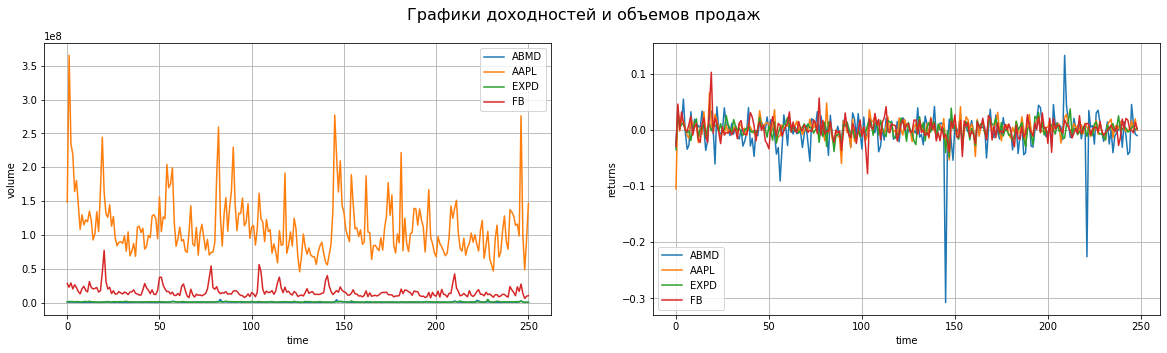

In [26]:
f = plt.figure(figsize=(20, 5))
ax1 = f.add_subplot(121)
f.suptitle('–ì—Ä–∞—Ñ–∏–∫–∏ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π –∏ –æ–±—ä–µ–º–æ–≤ –ø—Ä–æ–¥–∞–∂', fontsize=16)
#ax2 = f.add_subplot(122)

ax1=plt.grid()
ax1=plt.xlabel("time")
ax1=plt.ylabel("volume")
for stock in stocks_diff_sectors:
    ticker = volume[stock].to_list()
    periods = volume.index.to_list()
    ax1=plt.plot(periods, ticker)
ax1=plt.legend(labels=stocks_diff_sectors)

ax2 = f.add_subplot(122)

ax2=plt.grid()
ax2=plt.xlabel("time")
ax2=plt.ylabel("returns")
for stock in stocks_diff_sectors:
    ticker = log_returns[stock].to_list()
    periods = log_returns.index.to_list()
    ax2=plt.plot(periods, ticker)
ax2=plt.legend(labels=stocks_diff_sectors)
plt.show()


–£ Apple —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ –æ–±—ä–µ–º—ã –ø—Ä–æ–¥–∞–∂ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥—Ä—É–≥–∏–º–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏. 

–ö–æ–ª–µ–±–∞–Ω–∏—è –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π —É ABMD –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–µ–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏.

## 8. –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ (–≤—ã–±–æ—Ä–æ—á–Ω–æ) –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –∞–∫—Ç–∏–≤–æ–≤ —Å –ø–æ–º–æ—â—å—é —Ç–µ—Ö–Ω–∏–∫–∏ –∞–Ω–∞–ª–∏–∑–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π. –°–¥–µ–ª–∞–π—Ç–µ –∞–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ –∞–∫—Ç–∏–≤–æ–≤ –¥–ª—è –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ –æ–¥–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞ –∏ –¥–ª—è –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤. –°–¥–µ–ª–∞–π—Ç–µ –∞–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ (–≤—ã–±–æ—Ä–æ—á–Ω–æ) –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –∏ –æ–±—ä–µ–º–∞–º–∏ –ø—Ä–æ–¥–∞–∂ –æ–¥–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–∞. –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ –∞–∫—Ç–∏–≤—ã –∏–∑ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤. 

#### –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ –∞–∫—Ç–∏–≤–æ–≤ –¥–ª—è –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ –æ–¥–Ω–æ–≥–æ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞:

In [27]:
def plot_correlations(log_ret1, ticker1, log_ret2, ticker2):
    plt.scatter(log_ret1, log_ret2, c = 'green')
    plt.xlabel(ticker1)
    plt.ylabel(ticker2)
    plt.show()
    print('–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: ' , np.corrcoef(log_ret1.astype(float), log_ret2.astype(float))[1][0])

–î–ª—è –Ω–∞—á–∞–ª–∞ –±—É–¥–µ—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –¥–ª—è –ø–∞—Ä—ã –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ —Å–µ–∫—Ç–æ—Ä–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π (–æ—Ç—Ä–∞—Å–ª—å - –ø–æ–ª—É–ø—Ä–æ–≤–æ–¥–Ω–∏–∫–æ–≤–æ–µ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ). –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–æ–º–ø–∞–Ω–∏–∏ ASML Holding (ASML) –∏ Lam Research (LRCX).

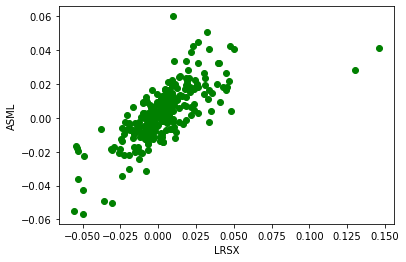

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.7259475388672443


In [28]:
plot_correlations(log_returns['LRCX'], 'LRSX', log_returns['ASML'], 'ASML')

–î–∞–ª–µ–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–∞—Ä—É –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–æ–Ω–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞ (–æ—Ç—Ä–∞—Å–ª—å - –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–µ –º–µ–¥–∏–∞ –∏ —É—Å–ª—É–≥–∏) - Alphabet Inc. (GOOG) –∏ Facebook Inc. (FB).

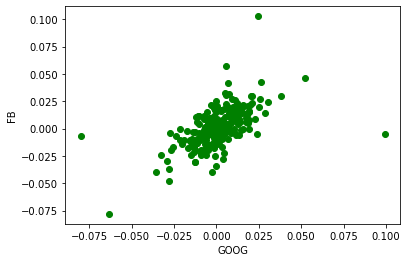

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.5715551706506572


In [29]:
plot_correlations(log_returns['GOOG'], 'GOOG', log_returns['FB'], 'FB')

–ò—Ç–∞–∫, –∫–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º, —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –Ω–µ–∫–æ—Ç–æ—Ä–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ –æ–¥–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞. –≠—Ç–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —É—Å–∏–ª–∏–≤–∞–µ—Ç—Å—è, –µ—Å–ª–∏ –∫–æ–º–ø–∞–Ω–∏–∏ –∫ —Ç–æ–º—É –∂–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –æ–¥–Ω–æ–π –æ—Ç—Ä–∞—Å–ª–∏.

#### –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏ –∞–∫—Ç–∏–≤–æ–≤ –¥–ª—è –∞–∫—Ç–∏–≤–æ–≤ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ–Ω–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤:

–¢–µ–ø–µ—Ä—å —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø–∞—Ä—É –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤ - Facebook Inc. (FB) –∏ Tesla (TSLA). –ü–µ—Ä–≤–∞—è –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∏—Ç –∫ –∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏–æ–Ω–Ω–æ–º—É —Å–µ–∫—Ç–æ—Ä—É, –≤—Ç–æ—Ä–∞—è –∫ —Å–µ–∫—Ç–æ—Ä—É —Ç–æ–≤–∞—Ä–æ–≤ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è.

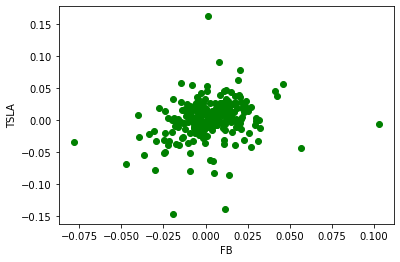

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.23929696141499013


In [30]:
plot_correlations(log_returns['FB'], 'FB', log_returns['TSLA'], 'TSLA')

–ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç–µ–π –∫–æ–º–ø–∞–Ω–∏–π PepsiCo, Inc. (PEP) –∏ ASML Holding (ASML). PepsiCo - —Å–µ–∫—Ç–æ—Ä –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª—å—Å–∫–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ –Ω–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–≥–æ –ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è, ASML - –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã–µ —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏.

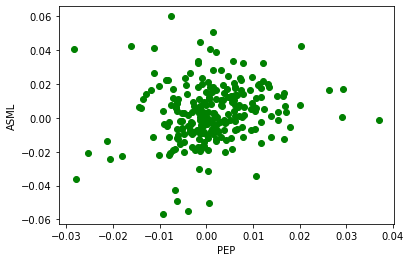

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.17856009529942518


In [31]:
plot_correlations(log_returns['PEP'], 'PEP', log_returns['ASML'], 'ASML')

–ö–∞–∫ –∏ —Å–ª–µ–¥–æ–≤–∞–ª–æ –æ–∂–∏–¥–∞—Ç—å, –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ —Ä–∞–∑–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤ –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–µ. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ —ç—Ç–∏—Ö –∫–æ–º–ø–∞–Ω–∏–π –Ω–µ—Ç.

#### –ê–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –∏ –æ–±—ä–µ–º–∞–º–∏ –ø—Ä–æ–¥–∞–∂ –æ–¥–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–∞:

In [32]:
volume = volume.loc[volume['Date'] != '2019-01-02'] #this is for dimensions of log_returns and volume to match

–ö–æ–º–ø–∞–Ω–∏—è Facebook:

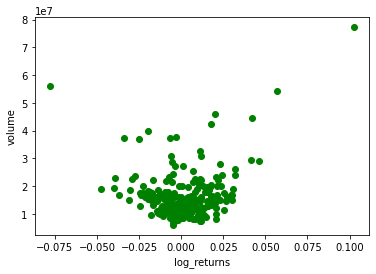

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.189453351846109


In [33]:
plot_correlations(log_returns['FB'], 'log_returns', volume['FB'], 'volume')

–ö–æ–º–ø–∞–Ω–∏—è  Lam Research:

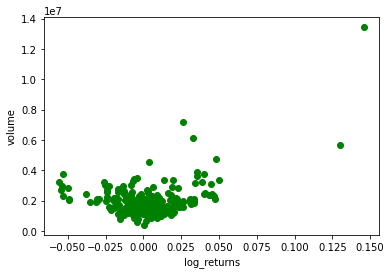

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  0.3952099361868317


In [34]:
plot_correlations(log_returns['LRCX'], 'log_returns', volume['LRCX'], 'volume')

–ö–æ–º–ø–∞–Ω–∏—è Tesla:

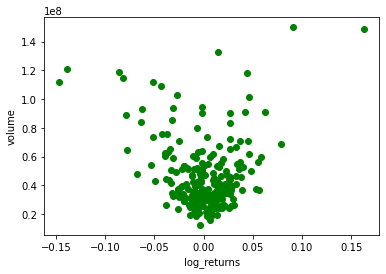

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:  -0.09430579845864653


In [35]:
plot_correlations(log_returns['TSLA'], 'log_returns', volume['TSLA'], 'volume')

–ò—Ç–∞–∫, –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –∏ –æ–±—ä–µ–º–∞–º–∏ –ø—Ä–æ–¥–∞–∂ –Ω–µ –≤—ã—è–≤–ª–µ–Ω–æ –Ω–∏ –≤ –æ–¥–Ω–æ–π –∏–∑ —Ç—Ä–µ—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π.

#### –¢–∞–∫–∂–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –±—É–¥–µ—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏ –∏–∑ –æ–¥–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞:

–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ –º—ã –≤—ã–±—Ä–∞–ª–∏ 10 –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ —Å–µ–∫—Ç–æ—Ä–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–π (–æ—Ç—Ä–∞—Å–ª—å - –ø–æ–ª—É–ø—Ä–æ–≤–æ–¥–Ω–∏–∫–æ–≤–æ–µ –æ–±–æ—Ä—É–¥–æ–≤–∞–Ω–∏–µ): ASML Holding (ASML), Lam Research (LRCX), NVIDIA (NVDA), Broadcom Inc.(AVGO), Micron Technology (MU), Analog Devices (ADI), KLA Corporation (KLAC), Microchip Technology (MCHP), Marvell Technology Group (MRVL), Skyworks Solutions (SWKS).

In [36]:
it_companies = log_returns[['ASML', 'LRCX', 'NVDA', 'AVGO', 'MU', 'ADI', 'KLAC', 'MCHP', 'MRVL', 'SWKS']]
it_companies.replace(0, 0.0001, inplace=True)

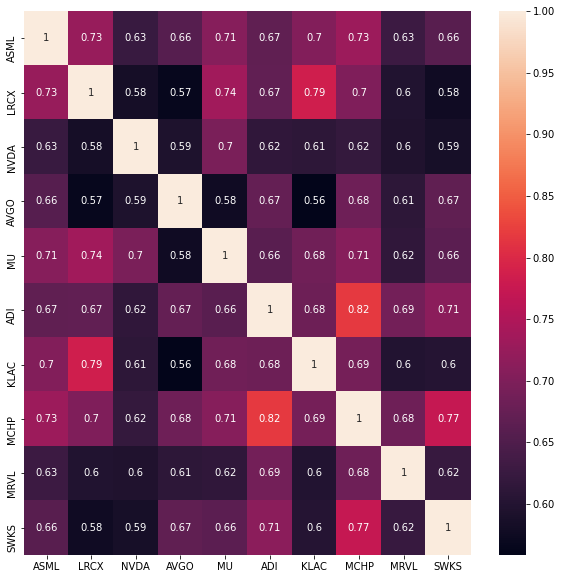

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(it_companies.corr(), annot=True)
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.57, –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 0.82. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ —Å—É—â–µ—Å—Ç–≤—É—é—Ç –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ –æ–¥–Ω–æ–≥–æ —Å–µ–∫—Ç–æ—Ä–∞.

#### –¢–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–∞—Ç—Ä–∏—Ü—É –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–µ–∂–¥—É –Ω–µ—Å–∫–æ–ª—å–∫–∏–º–∏ –∞–∫—Ç–∏–≤–∞–º–∏ –∏–∑ —Ä–∞–∑–Ω—ã—Ö –æ—Ç—Ä–∞—Å–ª–µ–π:

–î–ª—è –∞–Ω–∞–ª–∏–∑–∞ –º—ã –≤—ã–±—Ä–∞–ª–∏ 10 –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Å–µ–∫—Ç–æ—Ä–æ–≤: Facebook Inc. (FB), Lam Research (LRCX), PepsiCo, Inc. (PEP), Verisk Analytics (VRSK), Liberty Broadband (LBRDA), Pool (POOL), J.B. Hunt Transport Services (JBHT), Alliant Energy (LNT), Hasbro (HAS), First Citizens BancShares (FCNCA).

In [38]:
other_companies = log_returns[['FB', 'LRCX', 'PEP', 'VRSK', 'LBRDA', 'POOL', 'JBHT', 'LNT', 'HAS', 'FCNCA']]
other_companies.replace(0, 0.0001, inplace=True)

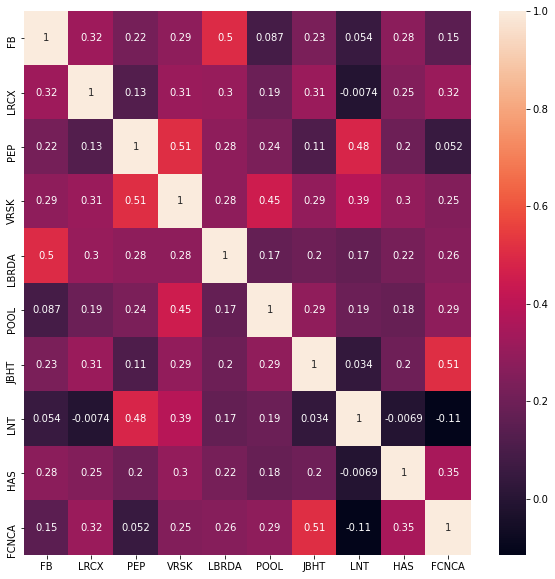

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(other_companies.corr(), annot=True)
plt.show()

–ö–∞–∫ –≤–∏–¥–Ω–æ –ø–æ –º–∞—Ç—Ä–∏—Ü–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.11, –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –¥–æ—Å—Ç–∏–≥–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è 0.51. –≠—Ç–æ –∑–Ω–∞—á–∏—Ç, —á—Ç–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–µ–π –º–µ–∂–¥—É –¥–æ—Ö–æ–¥–Ω–æ—Å—Ç—è–º–∏ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π –∏–∑ —Ä–∞–∑–Ω—ã—Ö –æ—Ç—Ä–∞—Å–ª–µ–π –Ω–µ—Ç.